In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import layers, models

2024-02-23 06:59:29.424296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 06:59:29.424422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 06:59:29.582543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = '/kaggle/input/unbiased/unbiased_dataset/train'
validation_dir = '/kaggle/input/unbiased/unbiased_dataset/test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    rotation_range=90,
    brightness_range=[0.5, 1.5],
#     width_shift_range=0.1,
#     height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 4264 images belonging to 4 classes.


In [5]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 1170 images belonging to 4 classes.


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dropout(0.5)) #Additional dropout
model.add(layers.Dense(4, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    epochs=80,  # Adjust the number of epochs
                    validation_data=validation_generator)

Epoch 1/80


I0000 00:00:1708671667.029332     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


134/134 [==============================] - 115s 764ms/step - loss: 1.3157 - accuracy: 0.4885 - val_loss: 1.0092 - val_accuracy: 0.5718
Epoch 2/80
134/134 [==============================] - 66s 493ms/step - loss: 0.9344 - accuracy: 0.6295 - val_loss: 0.8771 - val_accuracy: 0.6641
Epoch 3/80
134/134 [==============================] - 66s 492ms/step - loss: 0.9060 - accuracy: 0.6452 - val_loss: 0.8513 - val_accuracy: 0.6675
Epoch 4/80
134/134 [==============================] - 65s 482ms/step - loss: 0.8902 - accuracy: 0.6604 - val_loss: 0.8525 - val_accuracy: 0.6761
Epoch 5/80
134/134 [==============================] - 65s 484ms/step - loss: 0.8571 - accuracy: 0.6674 - val_loss: 0.8316 - val_accuracy: 0.6726
Epoch 6/80
134/134 [==============================] - 66s 489ms/step - loss: 0.8321 - accuracy: 0.6820 - val_loss: 0.8603 - val_accuracy: 0.6701
Epoch 7/80
134/134 [==============================] - 65s 488ms/step - loss: 0.8260 - accuracy: 0.6860 - val_loss: 0.8099 - val_accuracy: 0.

In [11]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')

37/37 [==============================] - 5s 139ms/step - loss: 0.7382 - accuracy: 0.7350
Test Accuracy: 0.7350427508354187


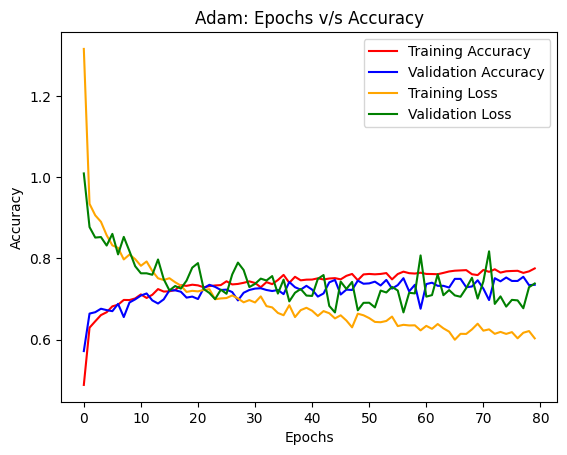

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="Training Accuracy", color='red')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='blue')
plt.plot(history.history['loss'], label="Training Loss", color='orange')
plt.plot(history.history['val_loss'], label="Validation Loss", color='green')
plt.title("Adam: Epochs v/s Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model.save('/kaggle/working/vgg16_adam.h5')